In [1]:
from astroquery.vizier import Vizier
from astroquery.sdss import SDSS
import astropy.units as u
from astropy import coordinates as coords
from astropy.table import Table, hstack, vstack
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from synphot import SourceSpectrum
from synphot.models import Empirical1D
from synphot import units
import random
import os.path
from collections import Counter
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import snr_derived


In [18]:
# Search Vizier for White Dwarf Main Sequence binaries catalog
catalog_list = Vizier.find_catalogs('J/MNRAS/433/3398')
print({k:v.description for k,v in catalog_list.items()})


{'J/MNRAS/433/3398': 'White dwarf main-sequence binaries (Rebassa-Mansergas+, 2013)'}


In [19]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())
print(catalogs)


TableList with 3 tables:
	'0:J/MNRAS/433/3398/table2' with 19 column(s) and 3419 row(s) 
	'1:J/MNRAS/433/3398/table5' with 8 column(s) and 45 row(s) 
	'2:J/MNRAS/433/3398/rejected' with 8 column(s) and 304 row(s) 


In [20]:
# Get 'WDMS catalog (3419 rows)'
Vizier.ROW_LIMIT = -1
WDMS = Vizier.get_catalogs('J/MNRAS/433/3398')[0]
print(len(WDMS))


3419


In [21]:
WDMS


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5
J000116.50+000204.8,0.31874,0.03468,18.85992,18.80826,18.91353,19.04969,19.22025,18.90210,18.94797,--,--,--,--,--,--,--,unknown,Sloan
J000152.09+000644.5,0.46703,0.11236,19.03607,18.57443,17.89913,17.48012,17.17712,16.51318,16.05914,15.40160,15.28913,--,--,--,--,--,WDMS,Sloan
J000218.67-064850.1,0.57781,-6.81391,20.44414,18.96709,17.78290,17.19696,16.79658,--,--,--,--,15.65600,14.93500,14.74100,14.66700,14.73700,,Sloan
J000238.16+162756.7,0.65898,16.46576,19.13624,18.56328,17.84974,16.80977,16.13724,--,--,--,--,14.76700,14.16200,13.89300,13.79200,13.68400,,Sloan
J000356.94-050332.8,0.98723,-5.05910,18.53305,18.22061,18.15110,17.48996,16.88521,--,--,--,--,15.58200,14.98400,14.50900,14.48600,14.42800,WDMS,Sloan
J000413.91+183616.4,1.05795,18.60455,18.71697,18.53066,18.57321,17.87642,17.23008,--,--,--,--,15.84700,15.16500,14.96200,14.79600,14.61400,,Sloan
J000504.91+243409.6,1.27047,24.56934,19.51332,18.89106,18.47674,17.48813,16.81468,--,--,--,--,15.36600,14.72600,14.40800,14.26700,14.11000,WDMS,Sloan
J000541.94+133734.2,1.42474,13.62616,19.23387,18.77803,18.86764,19.05692,19.17796,18.87453,18.99693,--,--,--,--,--,--,--,,Sloan


In [22]:
# Search Vizier for White Dwarf Main Sequence binaries catalog
catalog_list = Vizier.find_catalogs('SDSS WDMS binaries')
print({k:v.description for k,v in catalog_list.items()})


{'J/MNRAS/458/3808': 'DR9-12 SDSS WDMS binaries (Rebassa-Mansergas+, 2016)'}


In [23]:
Vizier.ROW_LIMIT = -1
WDMS2 = Vizier.get_catalogs('J/MNRAS/458/3808')[0]
print(len(WDMS2))


978


In [24]:
WDMS2


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Sloan
,deg,deg,mag,mag,mag,mag,mag,
str19,float64,float64,float64,float64,float64,float64,float64,str5
J000043.84+062106.3,0.182696,6.351754,21.893260,21.450380,21.672320,21.374130,20.894000,Sloan
J000632.13-103743.8,1.633897,-10.628854,21.264060,20.810260,20.998770,20.927190,20.603420,Sloan
J000756.03+055723.4,1.983487,5.956525,21.012110,20.514140,20.481390,20.043560,19.485020,Sloan
J000957.20-013341.4,2.488339,-1.561506,20.936930,20.470100,20.587980,20.342690,20.042510,Sloan
J001008.21-060553.4,2.534237,-6.098192,21.284090,21.082970,21.092230,21.119840,20.429440,Sloan
J001022.87+280633.7,2.595294,28.109369,22.034550,21.505440,21.474310,20.413130,20.173570,Sloan
J001331.01+120311.7,3.379221,12.053277,21.284560,20.614340,20.594140,20.305920,19.822510,Sloan
J001645.29-043553.2,4.188729,-4.598121,22.403620,21.243390,20.869170,20.052840,19.508980,Sloan


In [36]:
WDMS_full = vstack([WDMS, WDMS2])
from astropy import table
WDMS_full = table.unique(WDMS_full, keys='SDSS')


In [38]:
WDMS_full.write('tables/wdms.ecsv')


In [2]:
WDMS_full=Table.read('tables/wdms.ecsv')
WDMS_full


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5
J000043.84+062106.3,0.182696,6.351754,21.893260,21.450380,21.672320,21.374130,20.894000,--,--,--,--,--,--,--,--,--,--,Sloan
J000116.50+000204.8,0.318740,0.034680,18.859920,18.808260,18.913530,19.049690,19.220250,18.90210,18.94797,--,--,--,--,--,--,--,unknown,Sloan
J000152.09+000644.5,0.467030,0.112360,19.036070,18.574430,17.899130,17.480120,17.177120,16.51318,16.05914,15.40160,15.28913,--,--,--,--,--,WDMS,Sloan
J000218.67-064850.1,0.577810,-6.813910,20.444140,18.967090,17.782900,17.196960,16.796580,--,--,--,--,15.65600,14.93500,14.74100,14.66700,14.73700,--,Sloan
J000238.16+162756.7,0.658980,16.465760,19.136240,18.563280,17.849740,16.809770,16.137240,--,--,--,--,14.76700,14.16200,13.89300,13.79200,13.68400,--,Sloan
J000356.94-050332.8,0.987230,-5.059100,18.533050,18.220610,18.151100,17.489960,16.885210,--,--,--,--,15.58200,14.98400,14.50900,14.48600,14.42800,WDMS,Sloan
J000413.91+183616.4,1.057950,18.604550,18.716970,18.530660,18.573210,17.876420,17.230080,--,--,--,--,15.84700,15.16500,14.96200,14.79600,14.61400,--,Sloan
J000504.91+243409.6,1.270470,24.569340,19.513320,18.891060,18.476740,17.488130,16.814680,--,--,--,--,15.36600,14.72600,14.40800,14.26700,14.11000,WDMS,Sloan


In [39]:
# Pick 1000 random objects from the catalog
WDMS_1k = WDMS_full[random.sample(range(len(WDMS_full)), 1000)]


In [41]:
WDMS_1k.write('tables/wdms_1k.ecsv')


In [3]:
WDMS_1k=Table.read('tables/wdms_1k.ecsv')
WDMS_1k


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5
J212642.05+005246.5,321.675190,0.879590,19.978810,18.457390,17.196300,16.136960,15.543930,14.71141,14.16797,13.54024,13.31250,14.24600,13.53800,13.32000,13.25000,13.13900,--,Sloan
J090822.04+475144.7,137.091850,47.862420,20.532400,18.926280,17.641650,16.833600,16.421500,--,--,--,--,15.20700,14.47700,14.47800,14.23700,14.17200,--,Sloan
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan
J153040.12+010712.5,232.667180,1.120140,18.776590,18.390980,18.203420,17.340510,16.650700,15.80775,15.27345,--,14.55030,15.27500,14.83400,14.49100,14.39600,14.14900,--,Sloan
J103934.17+494641.8,159.892400,49.778305,21.969250,21.442590,21.596780,21.304570,20.507120,--,--,--,--,--,--,--,--,--,--,Sloan
J130608.49+012837.9,196.535390,1.477198,18.812610,19.020810,19.409940,19.450740,19.348210,--,--,--,--,--,--,--,--,--,--,Sloan
J213419.30+013137.3,323.580410,1.527020,18.563730,18.260640,18.095710,17.213610,16.514200,--,--,--,--,15.19000,14.58100,14.49100,14.33800,14.13300,--,Sloan
J130425.49-033232.4,196.106220,-3.542320,19.067790,18.666370,17.933700,17.296720,16.906390,--,--,--,--,--,--,--,14.78700,14.73100,--,Sloan


In [44]:
# Dictionary with objects with available SDSS spectrum
WDMS_1k_spec = {}
for i in range(len(WDMS_1k)):
    coord = str(WDMS_1k[i]['RAJ2000'])+" "+str(WDMS_1k[i]['DEJ2000'])
    pos = coords.SkyCoord(coord, unit=(u.deg, u.deg))
    # Query SDSS, default 2 arcsec radio
    xid = SDSS.query_region(pos, spectro=True, data_release=17)
    if xid!=None:
        WDMS_1k_spec[WDMS_1k[i]['SDSS']] = xid
print("Objects with SDSS spectrum:", len(WDMS_1k_spec))


C:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python39\lib\site-packages\astroquery\sdss\core.py:867: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
C:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python39\lib\site-packages\astropy\table\table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Objects with SDSS spectrum: 400


In [54]:
len(WDMS_1k_spec)


400

In [51]:
WDMS_1k_spec['J155904.62+035623.5']


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,bytes7
239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001662432,1837,53494,283,2068355977937184768,26
239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,0.00183719,2951,54592,65,3322548569197537280,26
239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001886334,4808,55705,420,5413442296535603200,v5_13_2


In [52]:
# 1st round for joint table
WDMS_1k_spec_t = Table()
for i in range(len(list(WDMS_1k_spec))):
    t1 = WDMS_1k[WDMS_1k['SDSS']==list(WDMS_1k_spec)[i]]
    t2 = WDMS_1k_spec[list(WDMS_1k_spec)[i]]
    t2p = Table()
    t1p = Table()
    for j in range(len(t2)):
        t2t = Table(t2[j], copy=True, dtype=('float64', 'float64', 'int64', 'int32', 'int32', 'int32', 'int32', 'float64', 'int32', 'int32', 'int32', 'int64', 'S7'))
        t2p = vstack([t2p, t2t])
        t1p = vstack([t1p, t1])
    o = hstack([t1p, t2p])
    WDMS_1k_spec_t = vstack([WDMS_1k_spec_t, o])


In [55]:
WDMS_1k_spec_t.write('tables/wdms_1k_w_spec.ecsv')


In [4]:
WDMS_1k_spec_t=Table.read('tables/wdms_1k_w_spec.ecsv')


In [5]:
WDMS_1k_spec_t


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan,ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5,float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,str7
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001662432,1837,53494,283,2068355977937184768,26
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,0.00183719,2951,54592,65,3322548569197537280,26
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001886334,4808,55705,420,5413442296535603200,v5_13_2
J103934.17+494641.8,159.892400,49.778305,21.969250,21.442590,21.596780,21.304570,20.507120,--,--,--,--,--,--,--,--,--,--,Sloan,159.89240236338,49.7782875061721,1237657629522264375,2830,301,4,314,-5.025144e-05,6694,56386,5,7536775457934694400,v5_13_2
J130608.49+012837.9,196.535390,1.477198,18.812610,19.020810,19.409940,19.450740,19.348210,--,--,--,--,--,--,--,--,--,--,Sloan,196.535383314416,1.47724903703652,1237651735227334665,1458,301,1,479,0.0003650358,4052,55600,746,4562351575398635520,v5_13_2
J130608.49+012837.9,196.535390,1.477198,18.812610,19.020810,19.409940,19.450740,19.348210,--,--,--,--,--,--,--,--,--,--,Sloan,196.535383314416,1.47724903703652,1237651735227334665,1458,301,1,479,0.000194866,4052,55589,744,4562351025458272256,v5_13_2
J135756.51-021823.1,209.485470,-2.306420,19.126040,18.965860,18.930320,18.669380,18.626510,--,--,17.49608,16.79712,--,--,--,--,--,QSO,Sloan,209.485467061802,-2.30642462393141,1237655498667000037,2334,301,3,91,1.75841,915,52443,312,1030284217654732800,26
J094259.54+015637.6,145.748120,1.943802,21.279500,20.743590,20.704330,20.516010,20.001490,--,--,--,--,--,--,--,--,--,--,Sloan,145.748114873087,1.94379827809914,1237651753995338054,1462,301,4,136,0.0001393152,4736,55631,148,5332302735210731520,v5_13_2


In [56]:
# Download spectrum files:
error = []
for l in range(len(WDMS_1k_spec_t)):
    plate = WDMS_1k_spec_t[l]['plate']
    mjd = WDMS_1k_spec_t[l]['mjd']
    fiber = WDMS_1k_spec_t[l]['fiberID']
    filename = 'spec-'+str(plate).zfill(4)+'-'+str(mjd)+'-'+str(fiber).zfill(4)+'.fits'
    if not os.path.exists('SDSSspec/'+filename):
        try:
            spec = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber, data_release=17)
            spec[0].writeto('SDSSspec/'+filename)
        except:
            csv_row = str(plate).zfill(4)+', '+str(mjd)+', '+str(fiber).zfill(4)
            error.append(csv_row)

with open('SDSSspec/error.txt', 'w') as f:
    for element in error:
        f.write(element + "\n")


C:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python39\lib\site-packages\astroquery\sdss\core.py:867: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [68]:
# Checking duplicates
# 5465	55988	396
# 5385	55960	741
# 5384	55984	56
# 4225	55455	702
# 3679	55209	542
# 3674	55182	298
a = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==5465]
b = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==5385]
c = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==5384]
d = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==4225]
e = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==3679]
f = WDMS_1k_spec_t[WDMS_1k_spec_t['plate']==3674]
g = vstack([a, vstack([b,c])])
h = vstack([e, vstack([f,g])])


In [69]:
# by the way: different DR have different run2d (pipeline reduction #), spectrum may vary a bit
# 26, 103, 104, v5_10_0 DR15, v5_13_0 DR16, v5_13_2 DR17
vstack([g,h])


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan,ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5,float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,bytes7
J142855.46+103313.8,217.231080,10.553820,18.597020,18.545800,18.474290,17.416320,16.638400,15.71925,15.15977,14.65579,14.38598,15.20100,14.62500,14.38100,14.26200,14.11300,--,Sloan,217.231083075448,10.553824422506,1237661949731536941,3836,301,3,452,1.371523e-05,5465,55988,396,6153151943009392640,v5_13_2
J142855.43+103313.6,217.230960,10.553778,18.597020,18.545800,18.474290,17.416320,16.638400,--,--,--,--,--,--,--,--,--,--,Sloan,217.231083075448,10.553824422506,1237661949731536941,3836,301,3,452,1.371523e-05,5465,55988,396,6153151943009392640,v5_13_2
J115553.94+105255.2,178.974770,10.882003,16.748830,16.858730,16.794950,16.159850,15.624820,--,--,--,--,--,--,--,--,--,--,Sloan,178.974861778108,10.8819820481296,1237658493889544228,3031,301,6,392,0.000106374,5385,55960,741,6063174782870116352,v5_13_2
J115553.97+105255.1,178.974870,10.881980,16.748830,16.858730,16.794950,16.159850,15.624820,14.74880,14.27843,13.70400,13.45491,14.32800,13.70200,13.46200,13.35600,13.23500,--,Sloan,178.974861778108,10.8819820481296,1237658493889544228,3031,301,6,392,0.000106374,5385,55960,741,6063174782870116352,v5_13_2
J115553.94+105255.2,178.974770,10.882003,16.748830,16.858730,16.794950,16.159850,15.624820,--,--,--,--,--,--,--,--,--,--,Sloan,178.974861778108,10.8819820481296,1237658493889544228,3031,301,6,392,0.0001114073,5384,55984,56,6061860591999670272,v5_13_2
J115553.97+105255.1,178.974870,10.881980,16.748830,16.858730,16.794950,16.159850,15.624820,14.74880,14.27843,13.70400,13.45491,14.32800,13.70200,13.46200,13.35600,13.23500,--,Sloan,178.974861778108,10.8819820481296,1237658493889544228,3031,301,6,392,0.0001114073,5384,55984,56,6061860591999670272,v5_13_2
J074935.41+521928.4,117.397580,52.324570,20.024360,18.585810,17.367520,16.371030,15.826150,--,--,--,--,--,--,--,--,--,--,Sloan,117.39762489263,52.3244941936556,1237663918413119869,4294,301,6,85,-0.0001480132,3679,55209,542,4142334828493428736,v5_13_2
J074935.42+521928.5,117.397580,52.324570,20.024360,18.585810,17.367520,16.371030,15.826150,--,--,--,--,14.53300,13.85400,13.65600,13.57000,13.43700,--,Sloan,117.39762489263,52.3244941936556,1237663918413119869,4294,301,6,85,-0.0001480132,3679,55209,542,4142334828493428736,v5_13_2


In [6]:
# Joint table, with class and subclass
WDMS_1k_spec_t_class = Table()
obtyp = Table(names=('class', 'subclass', 'sppixmask', 'zwarning', 'good', 'snr'), dtype=('S10', 'S10', 'S100', 'S100', 'bool', 'f8'))
for i in range(len(WDMS_1k_spec_t)):
    bitset_m = set()
    bitset_z = set()
    p = WDMS_1k_spec_t[i]['plate']
    m = WDMS_1k_spec_t[i]['mjd']
    f = WDMS_1k_spec_t[i]['fiberID']
    filename = 'spec-'+str(p).zfill(4)+'-'+str(m)+'-'+str(f).zfill(4)+'.fits'
    spec1d = Spectrum1D.read('wdms_1k/'+filename)
    snrval = snr_derived(spec1d, SpectralRegion(4000*u.AA, 9000*u.AA))
    hdul = fits.open('wdms_1k/'+filename)
    andmk = hdul[1].data['and_mask']
    zwarn = hdul[2].data['ZWARNING']
    counter = 0
    for v in range(len(zwarn)):
        bits = [bit for bit in range(0, 32) if (zwarn[v] & 1 << bit) > 0]
        if bits!=[]:
            bitset_z.update(bits)
    for v in range(len(andmk)):
        bits = [bit for bit in range(0, 32) if (andmk[v] & 1 << bit) > 0]
        if bits!=[]:
            if bits!=[]: counter=counter+1
            bitset_m.update(bits)
    badpct = counter/len(andmk)
    goodfl = True
    if badpct>0.1:
        goodfl = False
    obtyp.add_row((hdul[2].data['CLASS'][0], hdul[2].data['SUBCLASS'][0], str(bitset_m), str(bitset_z), goodfl, snrval))
WDMS_1k_spec_t_class = hstack([WDMS_1k_spec_t, obtyp])


In [8]:
WDMS_1k_spec_t_class.write('tables/wdms_1k_w_spec_class.ecsv', overwrite=True)


In [9]:
WDMS_1k_spec_t_class=Table.read('tables/wdms_1k_w_spec_class.ecsv')
WDMS_1k_spec_t_class


SDSS,RAJ2000,DEJ2000,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,Jmag2,Hmag2,Kmag2,W1mag,W2mag,SpType,Sloan,ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,class,subclass,sppixmask,zwarning,good,snr
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,,,,,,,
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str5,float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,str7,str6,str19,str28,str5,bool,float64
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001662432,1837,53494,283,2068355977937184768,26,STAR,WD,{23},set(),True,12.511028601934864
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,0.00183719,2951,54592,65,3322548569197537280,26,STAR,WD,"{16, 27, 23}",set(),True,14.648762736467816
J155904.62+035623.5,239.769270,3.939845,18.236220,18.399310,18.583660,18.685800,18.673540,--,--,--,--,--,--,--,--,--,--,Sloan,239.769266213072,3.93984454452779,1237655743488458979,2391,301,3,218,-0.001886334,4808,55705,420,5413442296535603200,v5_13_2,STAR,WDhotter,{23},set(),True,24.932542516051733
J103934.17+494641.8,159.892400,49.778305,21.969250,21.442590,21.596780,21.304570,20.507120,--,--,--,--,--,--,--,--,--,--,Sloan,159.89240236338,49.7782875061721,1237657629522264375,2830,301,4,314,-5.025144e-05,6694,56386,5,7536775457934694400,v5_13_2,STAR,WDhotter,"{18, 27, 23}",set(),True,2.314343621138151
J130608.49+012837.9,196.535390,1.477198,18.812610,19.020810,19.409940,19.450740,19.348210,--,--,--,--,--,--,--,--,--,--,Sloan,196.535383314416,1.47724903703652,1237651735227334665,1458,301,1,479,0.0003650358,4052,55600,746,4562351575398635520,v5_13_2,STAR,WDcooler,"{16, 27, 19, 23}",set(),True,10.852818389472036
J130608.49+012837.9,196.535390,1.477198,18.812610,19.020810,19.409940,19.450740,19.348210,--,--,--,--,--,--,--,--,--,--,Sloan,196.535383314416,1.47724903703652,1237651735227334665,1458,301,1,479,0.000194866,4052,55589,744,4562351025458272256,v5_13_2,STAR,WDcooler,{23},set(),True,13.059929197487001
J135756.51-021823.1,209.485470,-2.306420,19.126040,18.965860,18.930320,18.669380,18.626510,--,--,17.49608,16.79712,--,--,--,--,--,QSO,Sloan,209.485467061802,-2.30642462393141,1237655498667000037,2334,301,3,91,1.75841,915,52443,312,1030284217654732800,26,QSO,BROADLINE,"{16, 27, 23}",set(),True,8.345302478357796
J094259.54+015637.6,145.748120,1.943802,21.279500,20.743590,20.704330,20.516010,20.001490,--,--,--,--,--,--,--,--,--,--,Sloan,145.748114873087,1.94379827809914,1237651753995338054,1462,301,4,136,0.0001393152,4736,55631,148,5332302735210731520,v5_13_2,STAR,WDhotter,{23},set(),True,5.226483219335478


In [10]:
def plotspecwd(plate, mjd, fiber, direc, title, g, c, save=False):
    filename = 'spec-'+str(plate).zfill(4)+'-'+str(mjd)+'-'+str(fiber).zfill(4)+'.fits'
    hdul = fits.open(direc+filename)
    flux = hdul[1].data['flux']*1e-17*units.FLAM
    loglam = hdul[1].data['loglam']
    wave = 10 ** loglam

    sp = SourceSpectrum(Empirical1D, points=wave, lookup_table=flux, keep_neg=False)
    spu = units.convert_flux(sp.waveset, sp(sp.waveset), units.FLAM)

    plt.figure(figsize=(16,4))
    plt.plot(sp.waveset.value, spu.value)
    plt.xlabel('Wavelength [Ångströms]')
    plt.ylabel('Flux [erg/cm²/s/Å]')
    plt.title(title+' ; '+hdul[2].data['CLASS'][0]+' '+hdul[2].data['SUBCLASS'][0])
    if save==True:
        if g==False:
            folderout='bad/'
        else:
            if c!='STAR':
                folderout='other/'
            else:
                folderout='spec/'
        plt.savefig(folderout+'spec-'+str(plate).zfill(4)+'-'+str(mjd)+'-'+str(fiber).zfill(4)+'.png', facecolor='white', edgecolor='none')
    else:
        plt.show()

def plotspec_obwd(object, save=False):
    p=object['plate']
    m=object['mjd']
    f=object['fiberID']
    t=object['SDSS']
    g=object['good']
    c=str(object['class'])
    print(t+' ; '+str(p)+'-'+str(m)+'-'+str(f))
    plotspecwd(p, m, f, 'wdms_1k/', t+' ; '+str(p)+'-'+str(m)+'-'+str(f), g, c, save)


In [ ]:
# Plot (and save) spectrum loop
for l in range(len(WDMS_1k_spec_t_class)):
    plotspec_obwd(WDMS_1k_spec_t_class[l], save=True)


J155904.62+035623.5 ; 1837-53494-283


  points: [5579.5596 8348.34   8404.27   8431.405  8832.833  8892.009  8963.964
 9055.238 ]
  lookup_table: [-1.62689801e-05 -4.35171610e-06 -3.16962573e-07 -7.61885429e-07
 -1.07132794e-05 -1.91649621e-05 -9.45517787e-07 -1.14114073e-06] [synphot.models]


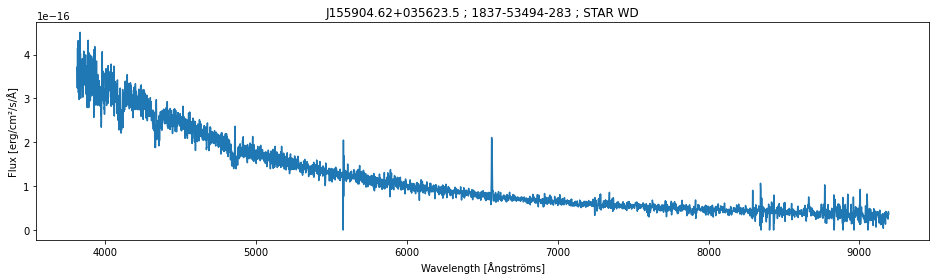

In [11]:
plotspec_obwd(WDMS_1k_spec_t_class[0])
